In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("train.csv")

In [6]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

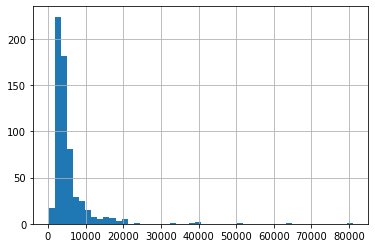

In [10]:
df['ApplicantIncome'].hist(bins=50)

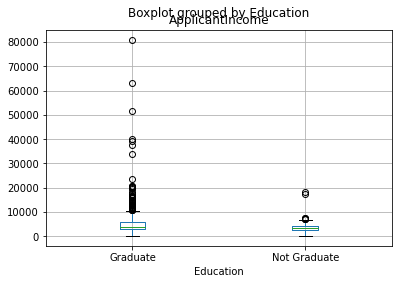

In [24]:
df.boxplot(column='ApplicantIncome', by='Education')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F8C481670>]],
      dtype=object)

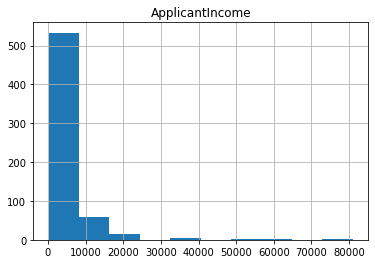

In [34]:
df.hist(column = 'ApplicantIncome')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [68]:
def num_missing(x):
  return sum(x.isnull())

df.apply(num_missing, axis=0)


Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
from scipy.stats import mode

mode(df['Gender']).mode[0]

df['Gender'].fillna(mode(df['Gender']).mode[0], inplace=True)
df['Married'].fillna(mode(df['Married']).mode[0], inplace=True)
df['Self_Employed'].fillna(mode(df['Self_Employed']).mode[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


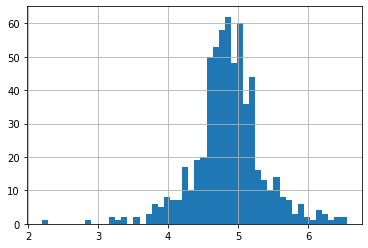

In [74]:
df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=50)


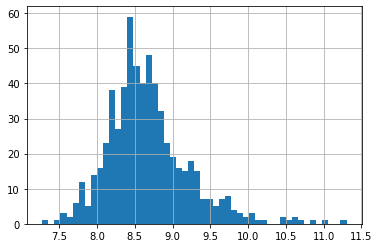

In [77]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=50)

In [31]:
#A = np.arange(5,21).reshape(4,4)

#A


B = np.mat([[1, 1, 1],[2, 1, 0],[5, 3, 2]])
Z = np.array([[1],[1], [4]])
print(Z)
Binv = np.linalg.inv(B) 
Binv.dot(Z)


[[1]
 [1]
 [4]]


matrix([[ 1.],
        [-1.],
        [ 1.]])